# Is Global Warming a Thing?

#### This is an attempt  to find comparisons between the assumption that global warming is real or not.
#### To decide, you'll conduct a study on a 200-year trend from 1813-2013. These samples should be sufficient enough to determine the validity of Global Warming.

<strong>Note</strong>: to complete this data report, you will need to calculate moving average of weather over a period of 200 years. Click <a href="https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm">here</a> to learn how to calculate moving averages.

<strong>Moving averages are also known as rolling averages</strong>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Retrieving Data

In [3]:
df_global = pd.read_csv('./weather_global.csv')
df_chicago = pd.read_csv('./weather_chicago.csv')


In [4]:
df_global.head()


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
df_global.tail(20)


,year,avg_temp
246,1996,9.04
247,1997,9.20
248,1998,9.52
249,1999,9.29
250,2000,9.20
251,2001,9.41
252,2002,9.57
253,2003,9.53
254,2004,9.32
255,2005,9.70


In [6]:
df_chicago.head()


,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN


In [7]:
df_chicago.tail()


,year,city,country,avg_temp
266,2009,Chicago,United States,10.30
267,2010,Chicago,United States,11.82
268,2011,Chicago,United States,11.21
269,2012,Chicago,United States,12.82
270,2013,Chicago,United States,11.59


## Clean Data

#### Drop 'city' and 'country' columns

In [8]:
df_chicago.drop(['city', 'country'], axis=1, inplace=True)
df_chicago.head()


,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
3,1746,NaN
4,1747,NaN


#### Check for null values

In [9]:
df_global.isnull()


,year,avg_temp
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
261,False,False
262,False,False
263,False,False
264,False,False


In [58]:
df_chicago.isnull()

,year,avg_temp
21,False,False
22,False,False
23,False,False
24,False,False
25,False,False
...,...,...
266,False,False
267,False,False
268,False,False
269,False,False


In [10]:
df_chicago.isnull().sum()


year        0
avg_temp    4
dtype: int64

#### Remove null values

In [11]:
(df_chicago.dropna)


<bound method DataFrame.dropna of      year  avg_temp
0    1743      5.44
1    1744     11.73
2    1745      1.80
3    1746       NaN
4    1747       NaN
..    ...       ...
266  2009     10.30
267  2010     11.82
268  2011     11.21
269  2012     12.82
270  2013     11.59

[271 rows x 2 columns]>

In [12]:
df_chicago.head()


,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
3,1746,NaN
4,1747,NaN


#### Convert all temps to Fahrenheit

In [13]:
#dot syntax
df_global.avg_temp


0      8.72
1      7.98
2      5.78
3      8.39
4      8.47
       ... 
261    9.52
262    9.51
263    9.61
264    9.57
265    9.83
Name: avg_temp, Length: 266, dtype: float64

In [60]:
df_chicago.avg_temp

21     10.63
22      9.78
23     10.49
24      9.41
25      8.95
       ...  
266    10.30
267    11.82
268    11.21
269    12.82
270    11.59
Name: avg_temp, Length: 250, dtype: float64

In [14]:
df_global['avg_temp']


0      8.72
1      7.98
2      5.78
3      8.39
4      8.47
       ... 
261    9.52
262    9.51
263    9.61
264    9.57
265    9.83
Name: avg_temp, Length: 266, dtype: float64

In [61]:
df_chicago['avg_temp']

21     10.63
22      9.78
23     10.49
24      9.41
25      8.95
       ...  
266    10.30
267    11.82
268    11.21
269    12.82
270    11.59
Name: avg_temp, Length: 250, dtype: float64

In [15]:
df_global.avg_temp = df_global.avg_temp.apply(lambda temp: round(temp * (9/5) + 32, 2))
df_chicago.avg_temp = df_chicago.avg_temp.apply(lambda temp: round(temp * (9/5) + 32, 2))


In [18]:
df_global.head()


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [62]:
df_chicago.head()


,year,avg_temp
21,1764,10.63
22,1765,9.78
23,1766,10.49
24,1767,9.41
25,1768,8.95


#### Trim results to same time period

In [16]:
df_global.query('avg_temp < 45')


,year,avg_temp
2,1752,42.40
8,1758,44.13
10,1760,44.94
18,1768,44.20
59,1809,44.74
60,1810,44.46
61,1811,44.35
62,1812,44.69
66,1816,44.49
67,1817,44.56


In [17]:
df_global[df_global['avg_temp'] < 45]


,year,avg_temp
2,1752,42.40
8,1758,44.13
10,1760,44.94
18,1768,44.20
59,1809,44.74
60,1810,44.46
61,1811,44.35
62,1812,44.69
66,1816,44.49
67,1817,44.56


In [21]:
df_global = df_global.query('year >= 1764 and year <= 2013')


In [20]:
df_global.head()


,year,avg_temp
14,1764,47.12
15,1765,46.85
16,1766,47.14
17,1767,46.80
18,1768,44.20


In [48]:
df_chicago.query('avg_temp < 45')

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19
...,...,...
266,2009,10.30
267,2010,11.82
268,2011,11.21
269,2012,12.82


In [49]:
df_chicago[df_chicago['avg_temp'] < 45]

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19
...,...,...
266,2009,10.30
267,2010,11.82
268,2011,11.21
269,2012,12.82


In [52]:
df_chicago = df_chicago.query('year >= 1764 and year <= 2013')

In [51]:
df_chicago.head()

,year,avg_temp
21,1764,10.63
22,1765,9.78
23,1766,10.49
24,1767,9.41
25,1768,8.95


#### Save to new CSVs

In [22]:
df_global.to_csv('weather_global_v2.csv')

df_g = pd.read_csv('./weather_global_v2.csv')
df_g.head()


,Unnamed: 0,year,avg_temp
0,14,1764,47.12
1,15,1765,46.85
2,16,1766,47.14
3,17,1767,46.80
4,18,1768,44.20


In [55]:
df_chicago.to_csv('weather_chicago_v2.csv')

df_c = pd.read_csv('./weather_chicago_v2.csv')
df_c.head()

,Unnamed: 0,year,avg_temp
0,21,1764,10.63
1,22,1765,9.78
2,23,1766,10.49
3,24,1767,9.41
4,25,1768,8.95


## Global 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

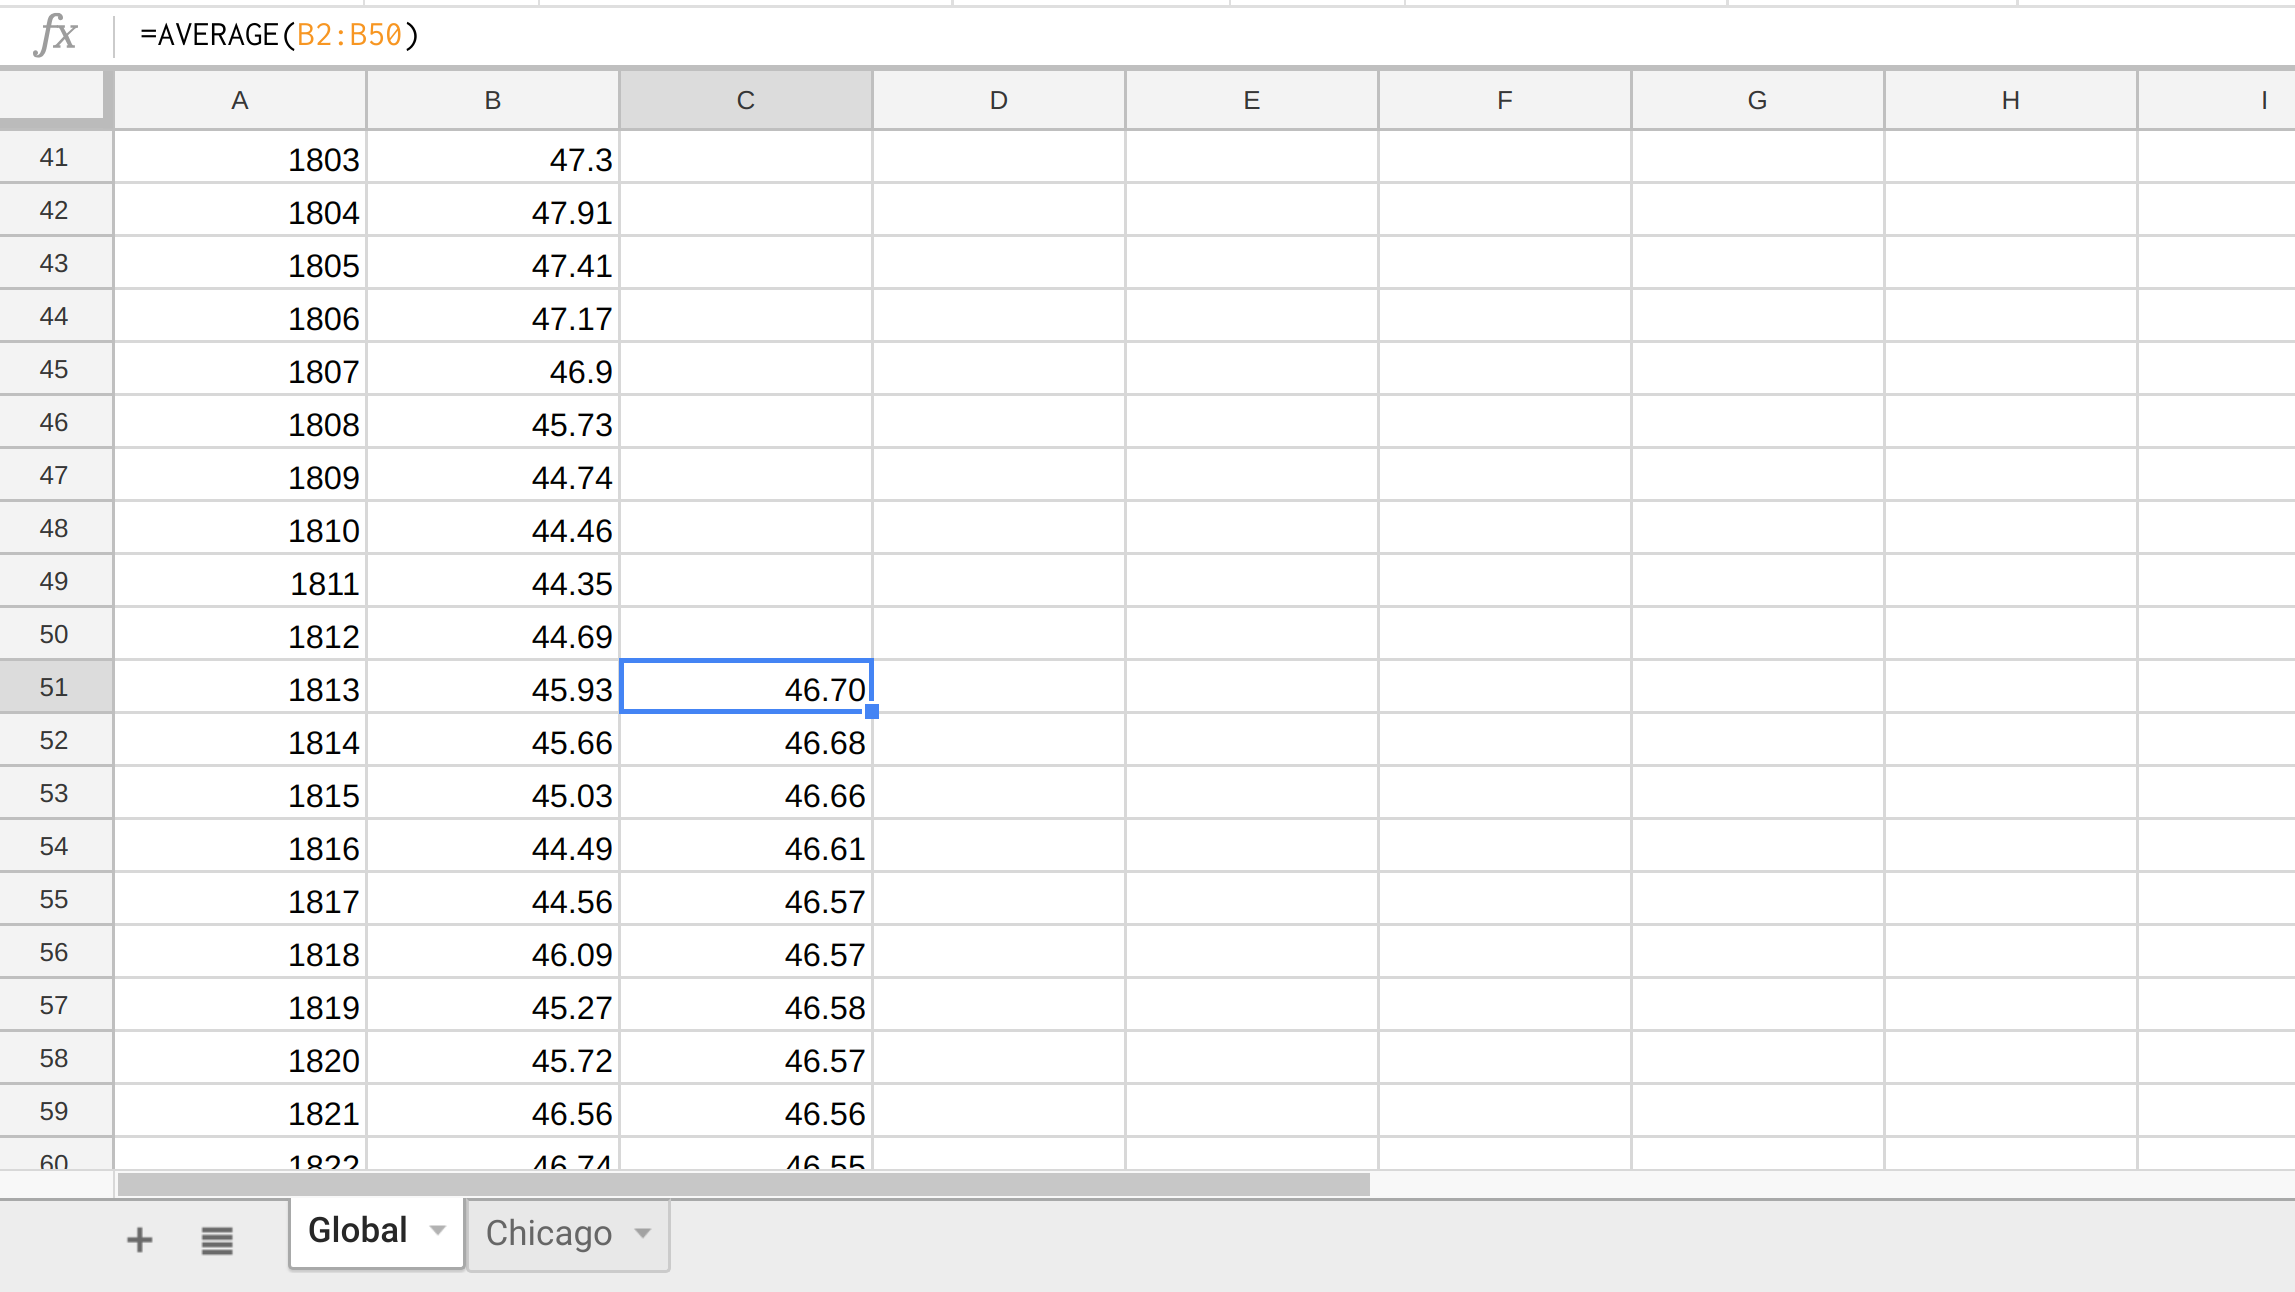

In [13]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create a new column that holds rolling averages

In [25]:
df_g['ra_50'] = df_g.avg_temp.rolling(50).mean()





In [26]:
df_g.tail()



,Unnamed: 0,year,avg_temp,ra_50
245,259,2009,49.12,48.1466
246,260,2010,49.46,48.1870
247,261,2011,49.14,48.2130
248,262,2012,49.12,48.2404
249,263,2013,49.30,48.2674


In [66]:
df_c['ra_50'] = df_c.avg_temp.rolling(50).mean()

In [65]:
df_c.tail()

,Unnamed: 0,year,avg_temp
245,266,2009,10.30
246,267,2010,11.82
247,268,2011,11.21
248,269,2012,12.82
249,270,2013,11.59


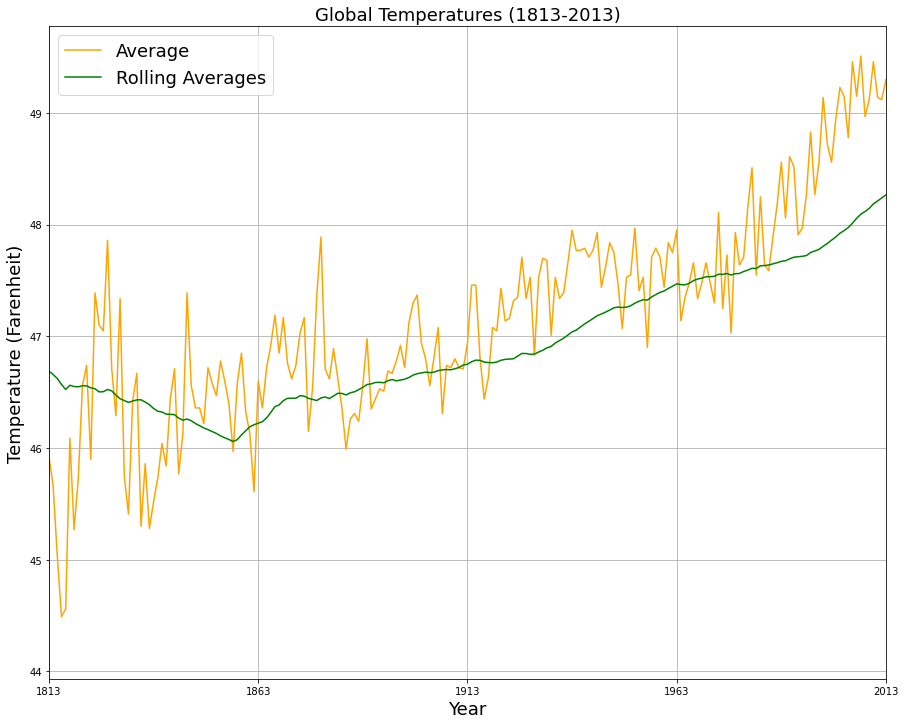

In [63]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']

plt.subplots(figsize=(15,12))

plt.grid(True)
plt.title('Global Temperatures (1813-2013)', fontsize=18)
plt.plot(df_g.year, df_g.avg_temp, color='orange')
plt.plot(df_g.year, df_g.ra_50, color='green')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.xticks(year_range, year_labels)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Temperature (Farenheit)', fontsize=18)
plt.legend(['Average', 'Rolling Averages'], loc=2, prop={'size':18});

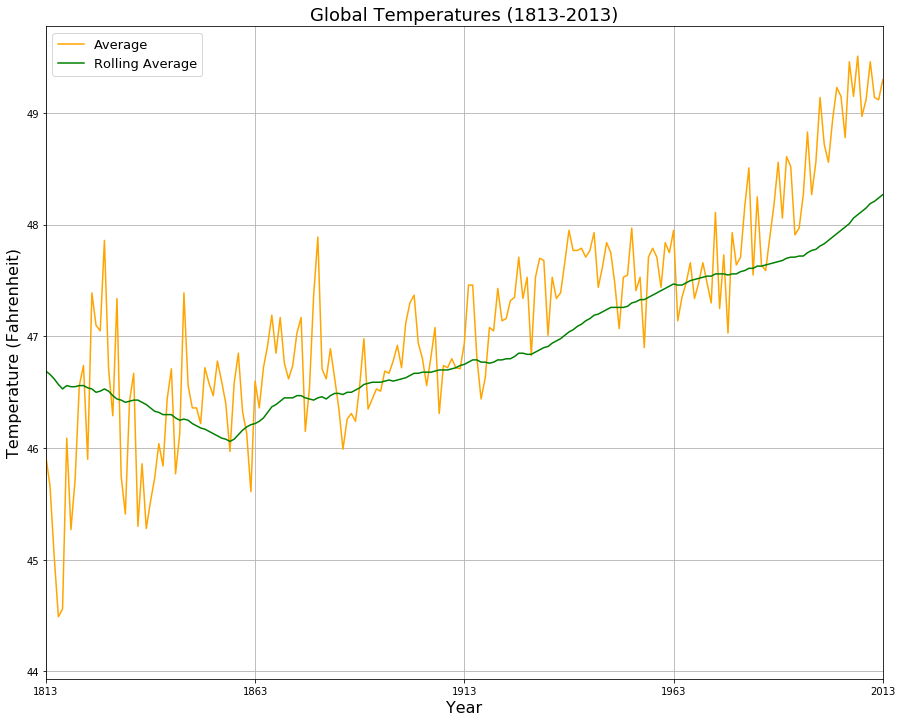

In [15]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the global temperature by year (yellow) vs the 
# rolling average by year (green)

## Chicago 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

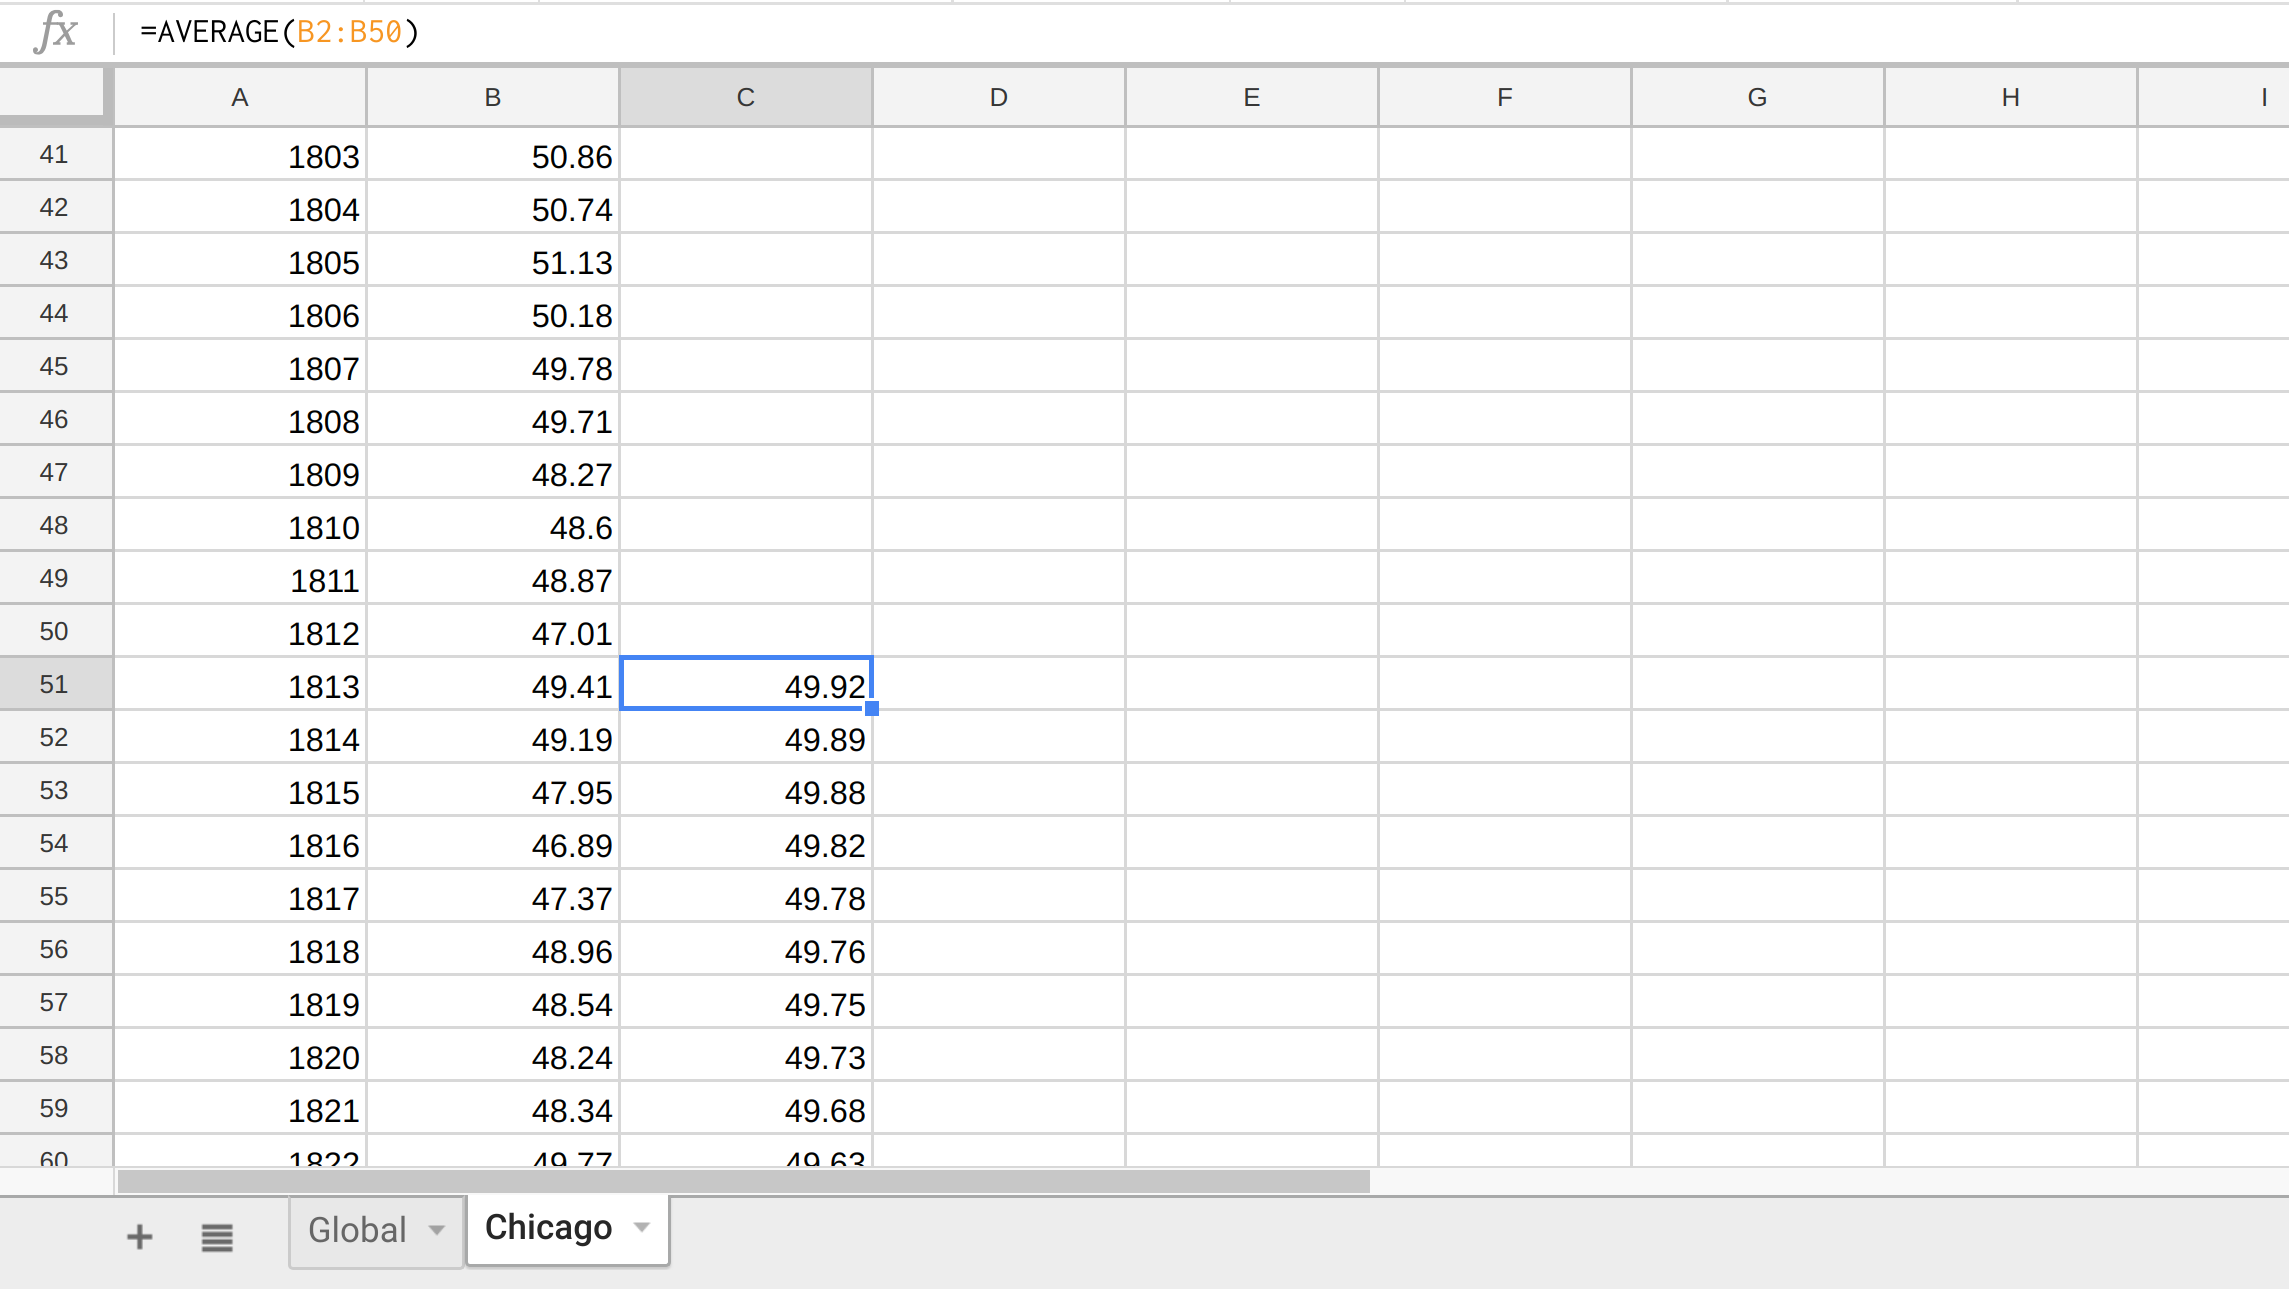

In [16]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create new column that holds rolling averages

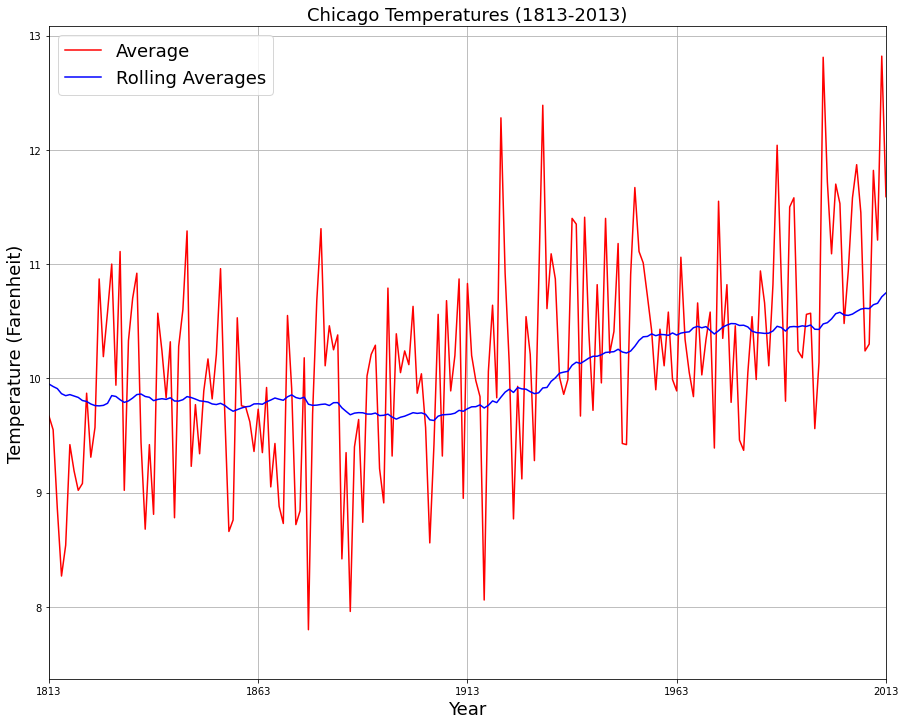

In [69]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']

plt.subplots(figsize=(15,12))

plt.grid(True)
plt.title('Chicago Temperatures (1813-2013)', fontsize=18)
plt.plot(df_c.year, df_c.avg_temp, color='red')
plt.plot(df_c.year, df_c.ra_50, color='blue')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.xticks(year_range, year_labels)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Temperature (Farenheit)', fontsize=18)
plt.legend(['Average', 'Rolling Averages'], loc=2, prop={'size':18});


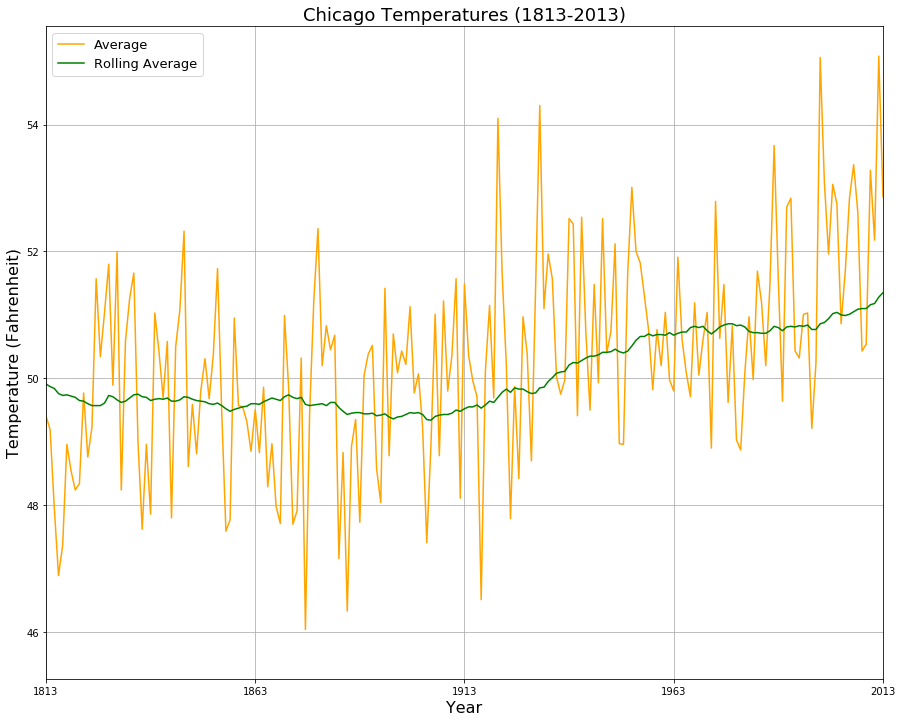

In [18]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the local temperature (for Chicago) by year (yellow) vs the 
# rolling average by year (green)

## Conclusions
#### 1) 
#### 2) 
#### 3) 
#### 4) 